# Data Mining: Prediction and Analysis of Customer Churn 
## Surya Keswani 
### sukeswan@ucsc.edu

### This notebook anaylizes predicts the likelihood of customer churn based on the data provided. 

#### Overview
The Customer Churn dataset, included as an excel file in the provided code directory,  contains 20,000 examples, each with 12 attributes, describing features of customers of a mobile phone provider. Customer churn signifies which customers have stopped using one company's product or service during a certain time frame. The file’s fields include data on each customer such as their education, income, value of house, their monthly usage situation (like the number of over 15 mins calls, average call duration), and whether they churned within a month when the data was captured. The data was uniformly sampled from the full database. The goal of the data set is to predict the class variable LEAVE representing whether each customer decided to quit the company or not. The class variable, LEAVE, is the last variable on each line, and its legal values are LEAVE and STAY.

#### Files
1. `Customer Churn Notebook.ipynb`: Jupyter notebook that includes all data processing and data anaylsis code
2. `Customer_Churn.xlsx`: An excel file containing all the raw data. 
3. `DT.png`: Picture of the decision tree created 
4. `DT_ROC.png`: ROC curve image of the decision tree
5. `Log_ROC.png`: ROC curve image of the logistic regression classifier
6. `Customer Churn Analysis.pdf`: Report of findings based on this notebook 


#### Data Attributes

1. `COLLEGE` : Is the customer college educated?

2. `INCOME`: Annual income

3. `OVERAGE`: Average overcharges per month

4. `LEFTOVER`: Average % leftover minutes per month

5. `HOUSE`: Value of dwelling (from census tract)

6. `HANDSET_PRICE`: Cost of phone

7. `OVER_15MINS_CALLS_PER_MONTH`: Average number of long (>15 mins) calls per month

8. `AVERAGE_CALL_DURATION`: Average call duration

9. `REPORTED_SATISFACTION`: Reported level of satisfaction

10. `REPORTED_USAGE_LEVEL`: Self-reported usage level

11. `CONSIDERING_CHANGE_OF_PLAN`: Was the customer considering changing his/her plan?

12. `LEAVE` : Class variable: whether customer left or stayed

#### Functions

1. `process_data`: Takes excel file and sheet name as inputs and processes the raw data. All data is converted to numeric values. Numeric conversions can be seen in the function as well as the written report. Will print the features of the dataset, the number of customers that stay, and a preview of the data.

2. `k_means()`: Takes 3 lists as inputs and runs the K means algorithm on the first 2 dimensions. Will print out the 3 dimensions graphed, the 1-10 K values mapped to distortion, and the results of the clustering algorithm. 

3. `data_heatmap()`: Takes dataframe as input and prints out a heatmap of all the attributes mapped to one another. 

4. `run_facets()`: Takes dataframe as input and prints out an interactive Google Facets data visualization. If the visualization is not properly displaying, reload the the browser. 

5. `group_data_mean()`: Takes dataframe and attribute as input and returns the other attributes mean values for each category of choosen attribute. Means values will be printed. 

6. `log_reg()`: Takens train and test data(and labels) and runs logistic regression on said data. The classifier accuracy metrics and ROC curve will be printed. 

7. `dtree()`: Takens train data, test data, labels, and feature names of data and runs the decision tree classifier on said data. The classifier accuracy metrics, an image of the decison tree and ROC curve will be printed. 

8. `main()`: Runs all the functions listed above. To see full output, change the `main()` cell settings by clicking *Cell -> Cell Output -> Toggle Scrolling*

#### Running this Notebook
To run this notebook click *Kernel -> Restart and Run All*. Keep in mind some of the functions take a few minutes to finalize the outputs. The notebook will be done running when you see NOTEBOOK COMPLETED at the bottom of the output. To run this script, all the corresponding libraries below must be installed and properly running. I reccomend creating a virtual envirnoment using Anaoconda. You will know all libraries have succesfully imported if you see "Imports completed" after the next cell. If the Google Facets visualization is not properly displaying, reload the the internet browser. 

#### Output Order

Because some functions take longer to produce outputs, the output of this notebook will be a litttle out of order. the way things will output is listed below. 

1. Features of the dataset, customers that stay, preview of the dataset
2. The k_means() output *->* Will print out the 3 dimensions graphed, th 1-10 K values mapped to distortion, and the results of the clustering algorithm. 
3. Google Facets visualization
4. The means of each attribute grouped by college level
5. The accuracy metrics of the logstic regression classifier
6. The heatmap of the data
7. The ROC curve of the Logstic Regression Classifier
7. The Decision tree metrics, an image of the Decision tree, and the Decision tree ROC Curve

In [1]:
import time
import pandas as pd                                                             
import io        
!pip install facets-overview                                                    
from IPython.core.display import display, HTML 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import numpy as np
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

print("Imports completed")

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
Imports completed


/opt/anaconda3/envs/Clustering/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
def process_data(FILE_NAME,SHEET_NAME):
    
    dfs = pd.read_excel(FILE_NAME, sheet_name = SHEET_NAME ) # excel sheet converted to dataframe

    
    dfs['COLLEGE'].replace({"zero": 0,                  # replace non-numeric attirbutes with numeriic attritubes                 
                            "one" : 1}, inplace = True)              

    dfs['REPORTED_SATISFACTION'].replace({     "very_sat": 5, 
                                               "sat": 4,
                                               "avg": 3, 
                                               "unsat": 2, 
                                               "very_unsat": 1}, 
                                                inplace = True)

    dfs['REPORTED_USAGE_LEVEL'].replace({      "very_high": 5, 
                                               "high": 4,
                                               "avg": 3, 
                                               "little": 2, 
                                               "very_little": 1}, 
                                                inplace = True)

    dfs['CONSIDERING_CHANGE_OF_PLAN'].replace({"actively_looking_into_it": 5, 
                                               "considering": 4,
                                               "perhaps": 3, 
                                               "no": 2, 
                                               "never_thought": 1}, 
                                                inplace = True)

    dfs['LEAVE'].replace({                     "LEAVE": 0, 
                                               "STAY" : 1}, 
                                                inplace = True)


    all_labels = dfs.iloc[:, 11:]              # the leave or stay values for all the data

    total = all_labels['LEAVE'].sum()          # checking if data is balanced

    train_data = dfs.iloc[:19000, :11]         # train data is first 19000 instances
    train_labels = dfs.iloc[:19000, 11:]       # train labels
    train_labels = train_labels['LEAVE'].tolist()


    test_data = dfs.iloc[19000:, :11]          # test data is last 1000 instances
    test_labels = dfs.iloc[19000:, 11:]        # test labels
    test_labels = test_labels['LEAVE'].tolist()

    features = list(dfs.columns)               # list of features
    del features[-1]

    print("The feautres of the churn dataset are:\n\n", features)
    print("\nThe number of customers that Stay are:", total)
    print("\nPreview of data is below:\n")
    print(dfs.head())
    
    print("\nDATA PROCESSING COMPLETED\n")
    
    return all_labels, train_data, train_labels, test_data, test_labels, features, dfs

print("process_data compiled")    

process_data compiled


In [3]:
def k_means(x,y,z):
    
    fig = plt.figure()                              # plot the overage vs house price vs over 15 minute calls
    ax = fig.add_subplot(projection='3d')

    ax.scatter(x, y, z, c='b', marker='o')
    
    ax.set_xlabel('Overage Charges')
    ax.set_ylabel('House Value')
    ax.set_zlabel('Number of Calls over 15 Minutes')
    fig.set_size_inches(12, 9)
    plt.show()
    
    X = list(zip(x, y))                             # make 2d data with overage and housing prices
    X = np.array(X)

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    
    distortions = []                                # use the elbow method to determine best K value
    for i in range(1, 11):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=10, max_iter=300,
            tol=1e-04, random_state=0
        )
        km.fit(X)
        distortions.append(km.inertia_)

    # plot                                         
    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()
    
    
    km = KMeans(                                   # run K means with 3 clusters
        n_clusters=3, init='random',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
    )
    y_km = km.fit_predict(X)
    
    # plot the 3 clusters
    plt.scatter(
        X[y_km == 0, 0], X[y_km == 0, 1],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='Cluster 1'
    )

    plt.scatter(
        X[y_km == 1, 0], X[y_km == 1, 1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='Cluster 2'
    )

    plt.scatter(
        X[y_km == 2, 0], X[y_km == 2, 1],
        s=50, c='lightblue',
        marker='v', edgecolor='black',
        label='Cluster 3'
    )

    # plot the centroids
    plt.scatter(
        km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids'
    )
    plt.xlabel('Overage Charges')
    plt.ylabel('Housing Price')
    plt.title('K Means Clustering Model')
    plt.legend(loc="lower right", scatterpoints=1)
    plt.figure(figsize=(3,4))
    plt.show()
    
    print("\nK MEANS ANALYSIS COMPLETED.\n")
    
print("k_means compiled.")

k_means compiled.


In [4]:
def data_heatmap(dfs):
    
    fig, ax = plt.subplots(figsize=(20,12))
    sns.heatmap(dfs.corr(), center=0, cmap='Blues', annot=True)
    ax.set_title('Attributes of Customer Churn Data')

    print("\nDATA HEATMAP COMPLETED")
    
print("data_heatmap compiled")

data_heatmap compiled


In [5]:
def run_facets(dataframe):
    
    jsonstr = dataframe.to_json(orient='records')   # Display the Dive visualization for the data
    HTML_TEMPLATE = """
            <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
            <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
            <facets-dive id="elem" height="600"></facets-dive>
            <script>
              var data = {jsonstr};
              document.querySelector("#elem").data = data;
            </script>"""
    html = HTML_TEMPLATE.format(jsonstr=jsonstr)    # Note: This code block has been taken from Google facets tutorial 
    display(HTML(html))                             # Link to tutorial: https://colab.research.google.com/github/PAIR-code/facets/blob/master/colab_facets.ipynb#scrollTo=blPpZw5R3Bb4
    
    print("\nFACETS VISUALIZATION COMPLETED\n")
    
print("run_facets compiled")

run_facets compiled


In [6]:
def group_data_mean(dataframe, variable):

    print("AVERAGES BELOW")
    print(dataframe.groupby(variable).mean())
    
    # Options for variable are listed below in comments
    
    # "COLLEGE"
    # "OVER_15MINS_CALLS_PER_MONTH"
    # "AVERAGE_CALL_DURATION"
    # "REPORTED_SATISFACTION"
    # "REPORTED_USAGE_LEVEL"
    # "CONSIDERING_CHANGE_OF_PLAN"
    # "LEAVE"
    
    print ("\nMEAN DATA GROUPING COMPLETED\n")
    
print("group_data_mean compiled")

group_data_mean compiled


In [7]:
def log_reg(train_data, train_labels,test_data, test_labels):
    logreg = LogisticRegression()
    logreg.fit(train_data, train_labels)
    y_pred = logreg.predict(test_data)
    print('Accuracy of the logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_data, test_labels)))

    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(test_labels, y_pred)
    print(confusion_matrix)

    print(classification_report(test_labels, y_pred)) ##book reading -> TN FP FN TP
    
    plt.rc("font", size=14)
    logit_roc_auc = roc_auc_score(test_labels, logreg.predict(test_data))
    fpr, tpr, thresholds = roc_curve(test_labels, logreg.predict_proba(test_data)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    print("\nLOGISTIC REGRESSION COMPLETED\n")
    
print("log_reg compiled")

log_reg compiled


In [8]:
def dtree(train_data, train_labels,test_data, test_labels, features):
    dt = DecisionTreeClassifier()
    dt.fit(train_data, train_labels)

    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)

    tree.plot_tree(dt,
                   feature_names = features, 
                   class_names= ['0','1'],
                   filled = True);

    fig.savefig('DT.png')

    y_pred = dt.predict(test_data)
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(test_labels, y_pred)
    print('Accuracy of the decision tree classifier on test set:', acc)
    
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(test_labels, y_pred)
    print(confusion_matrix)

    print(classification_report(test_labels, y_pred)) ##book reading -> TN FP FN TP
    
    plt.rc("font", size=14)
    dt_roc_auc = roc_auc_score(test_labels, dt.predict(test_data))
    fpr, tpr, thresholds = roc_curve(test_labels, dt.predict_proba(test_data)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Decision Tree(area = %0.2f)' % dt_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig('DT_ROC')
    plt.show()

    print("\nDECISION TREE COMPLETED\n")
    
print("dtree compiled")

dtree compiled


In [9]:
def main():

    all_labels, train_data, train_labels, test_data, test_labels, features, dfs = process_data("Customer_Churn.xlsx", "Sheet1")
    
    overage = list(dfs["OVERAGE"])
    house = list(dfs["HOUSE"])
    over15 = list(dfs["OVER_15MINS_CALLS_PER_MONTH"])
    k_means(overage, house, over15)
    
    data_heatmap(dfs)
    run_facets(dfs)
    group_data_mean(dfs, "COLLEGE")

    log_reg(train_data, train_labels,test_data, test_labels)
    dtree(train_data, train_labels,test_data, test_labels, features)
    
    print("NOTEBOOK COMPLETED")
    
print("main compiled")

main compiled


The feautres of the churn dataset are:

 ['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']

The number of customers that Stay are: 10148

Preview of data is below:

   COLLEGE  INCOME  OVERAGE  LEFTOVER   HOUSE  HANDSET_PRICE  \
0        0   31953        0         6  313378            161   
1        1   36147        0        13  800586            244   
2        1   27273      230         0  305049            201   
3        0  120070       38        33  788235            780   
4        1   29215      208        85  224784            241   

   OVER_15MINS_CALLS_PER_MONTH  AVERAGE_CALL_DURATION  REPORTED_SATISFACTION  \
0                            0                      4                      2   
1                            0                      6                      2   
2                           16                     15 

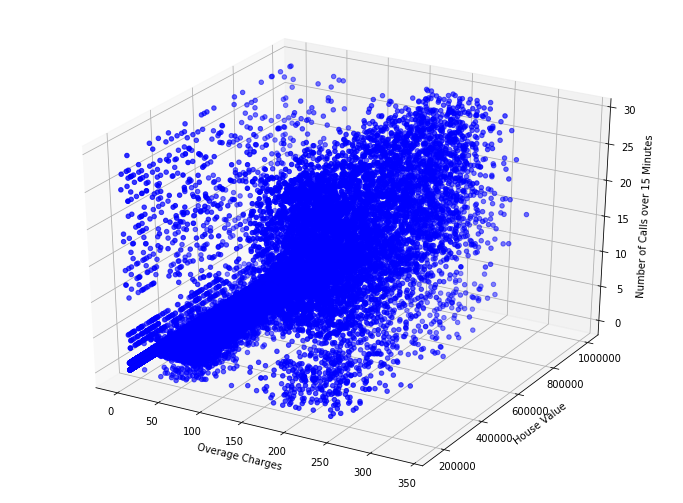

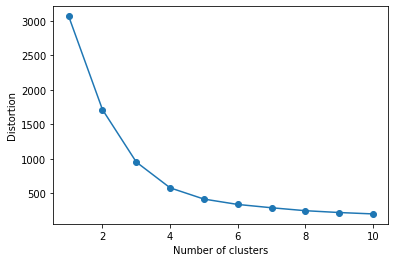

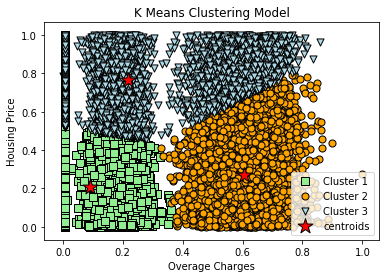

<Figure size 216x288 with 0 Axes>


K MEANS ANALYSIS COMPLETED.


DATA HEATMAP COMPLETED



FACETS VISUALIZATION COMPLETED

AVERAGES BELOW
               INCOME    OVERAGE   LEFTOVER          HOUSE  HANDSET_PRICE  \
COLLEGE                                                                     
0        79815.670920  86.246584  24.004421  493210.211113     387.477391   
1        80742.774482  85.715068  23.793889  493100.842357     391.732385   

         OVER_15MINS_CALLS_PER_MONTH  AVERAGE_CALL_DURATION  \
COLLEGE                                                       
0                           8.065314               6.008842   
1                           7.936704               5.995721   

         REPORTED_SATISFACTION  REPORTED_USAGE_LEVEL  \
COLLEGE                                                
0                     2.561093              2.815414   
1                     2.571059              2.814689   

         CONSIDERING_CHANGE_OF_PLAN     LEAVE  
COLLEGE                                        
0                          3.509747  0.514771  
1                    

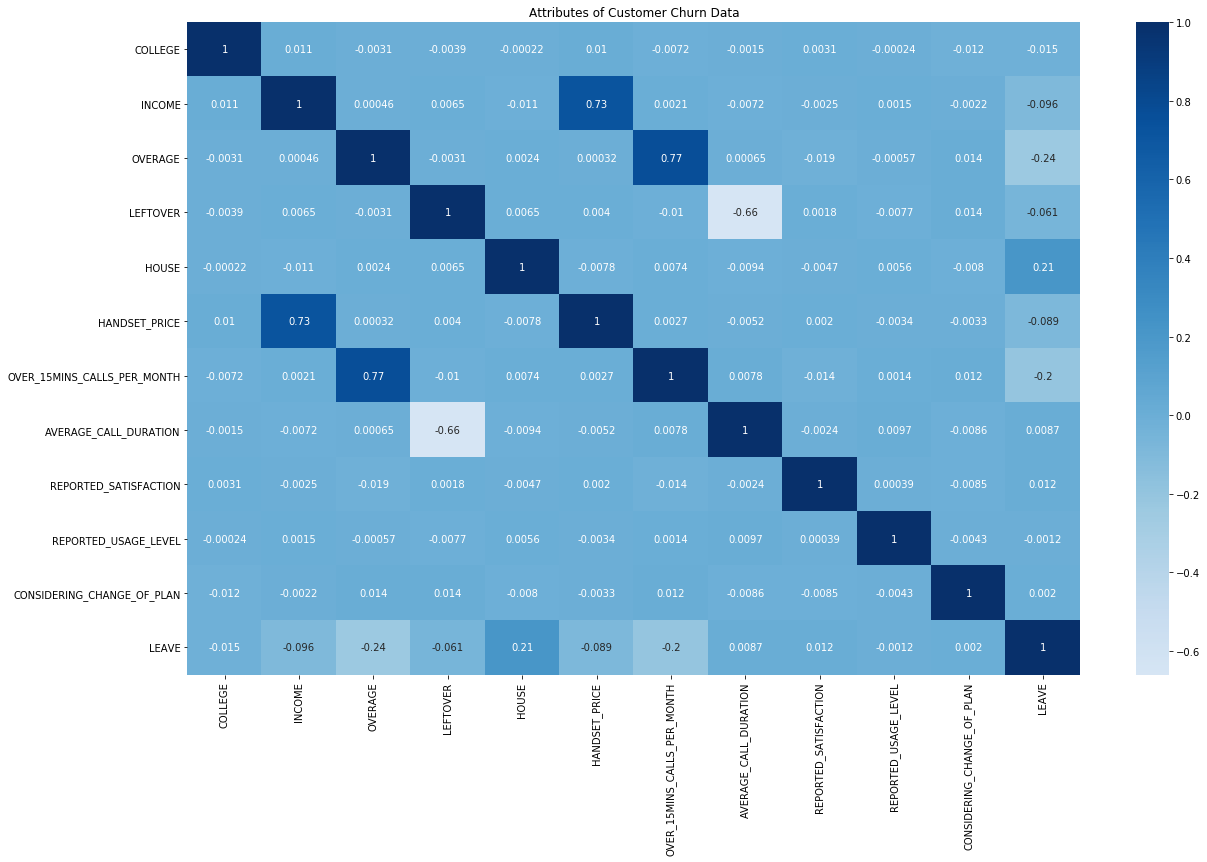

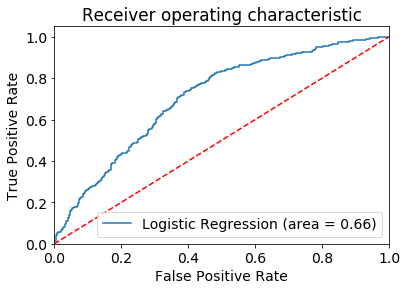


LOGISTIC REGRESSION COMPLETED

Accuracy of the decision tree classifier on test set: 0.611
[[287 195]
 [194 324]]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       482
           1       0.62      0.63      0.62       518

    accuracy                           0.61      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.61      0.61      0.61      1000



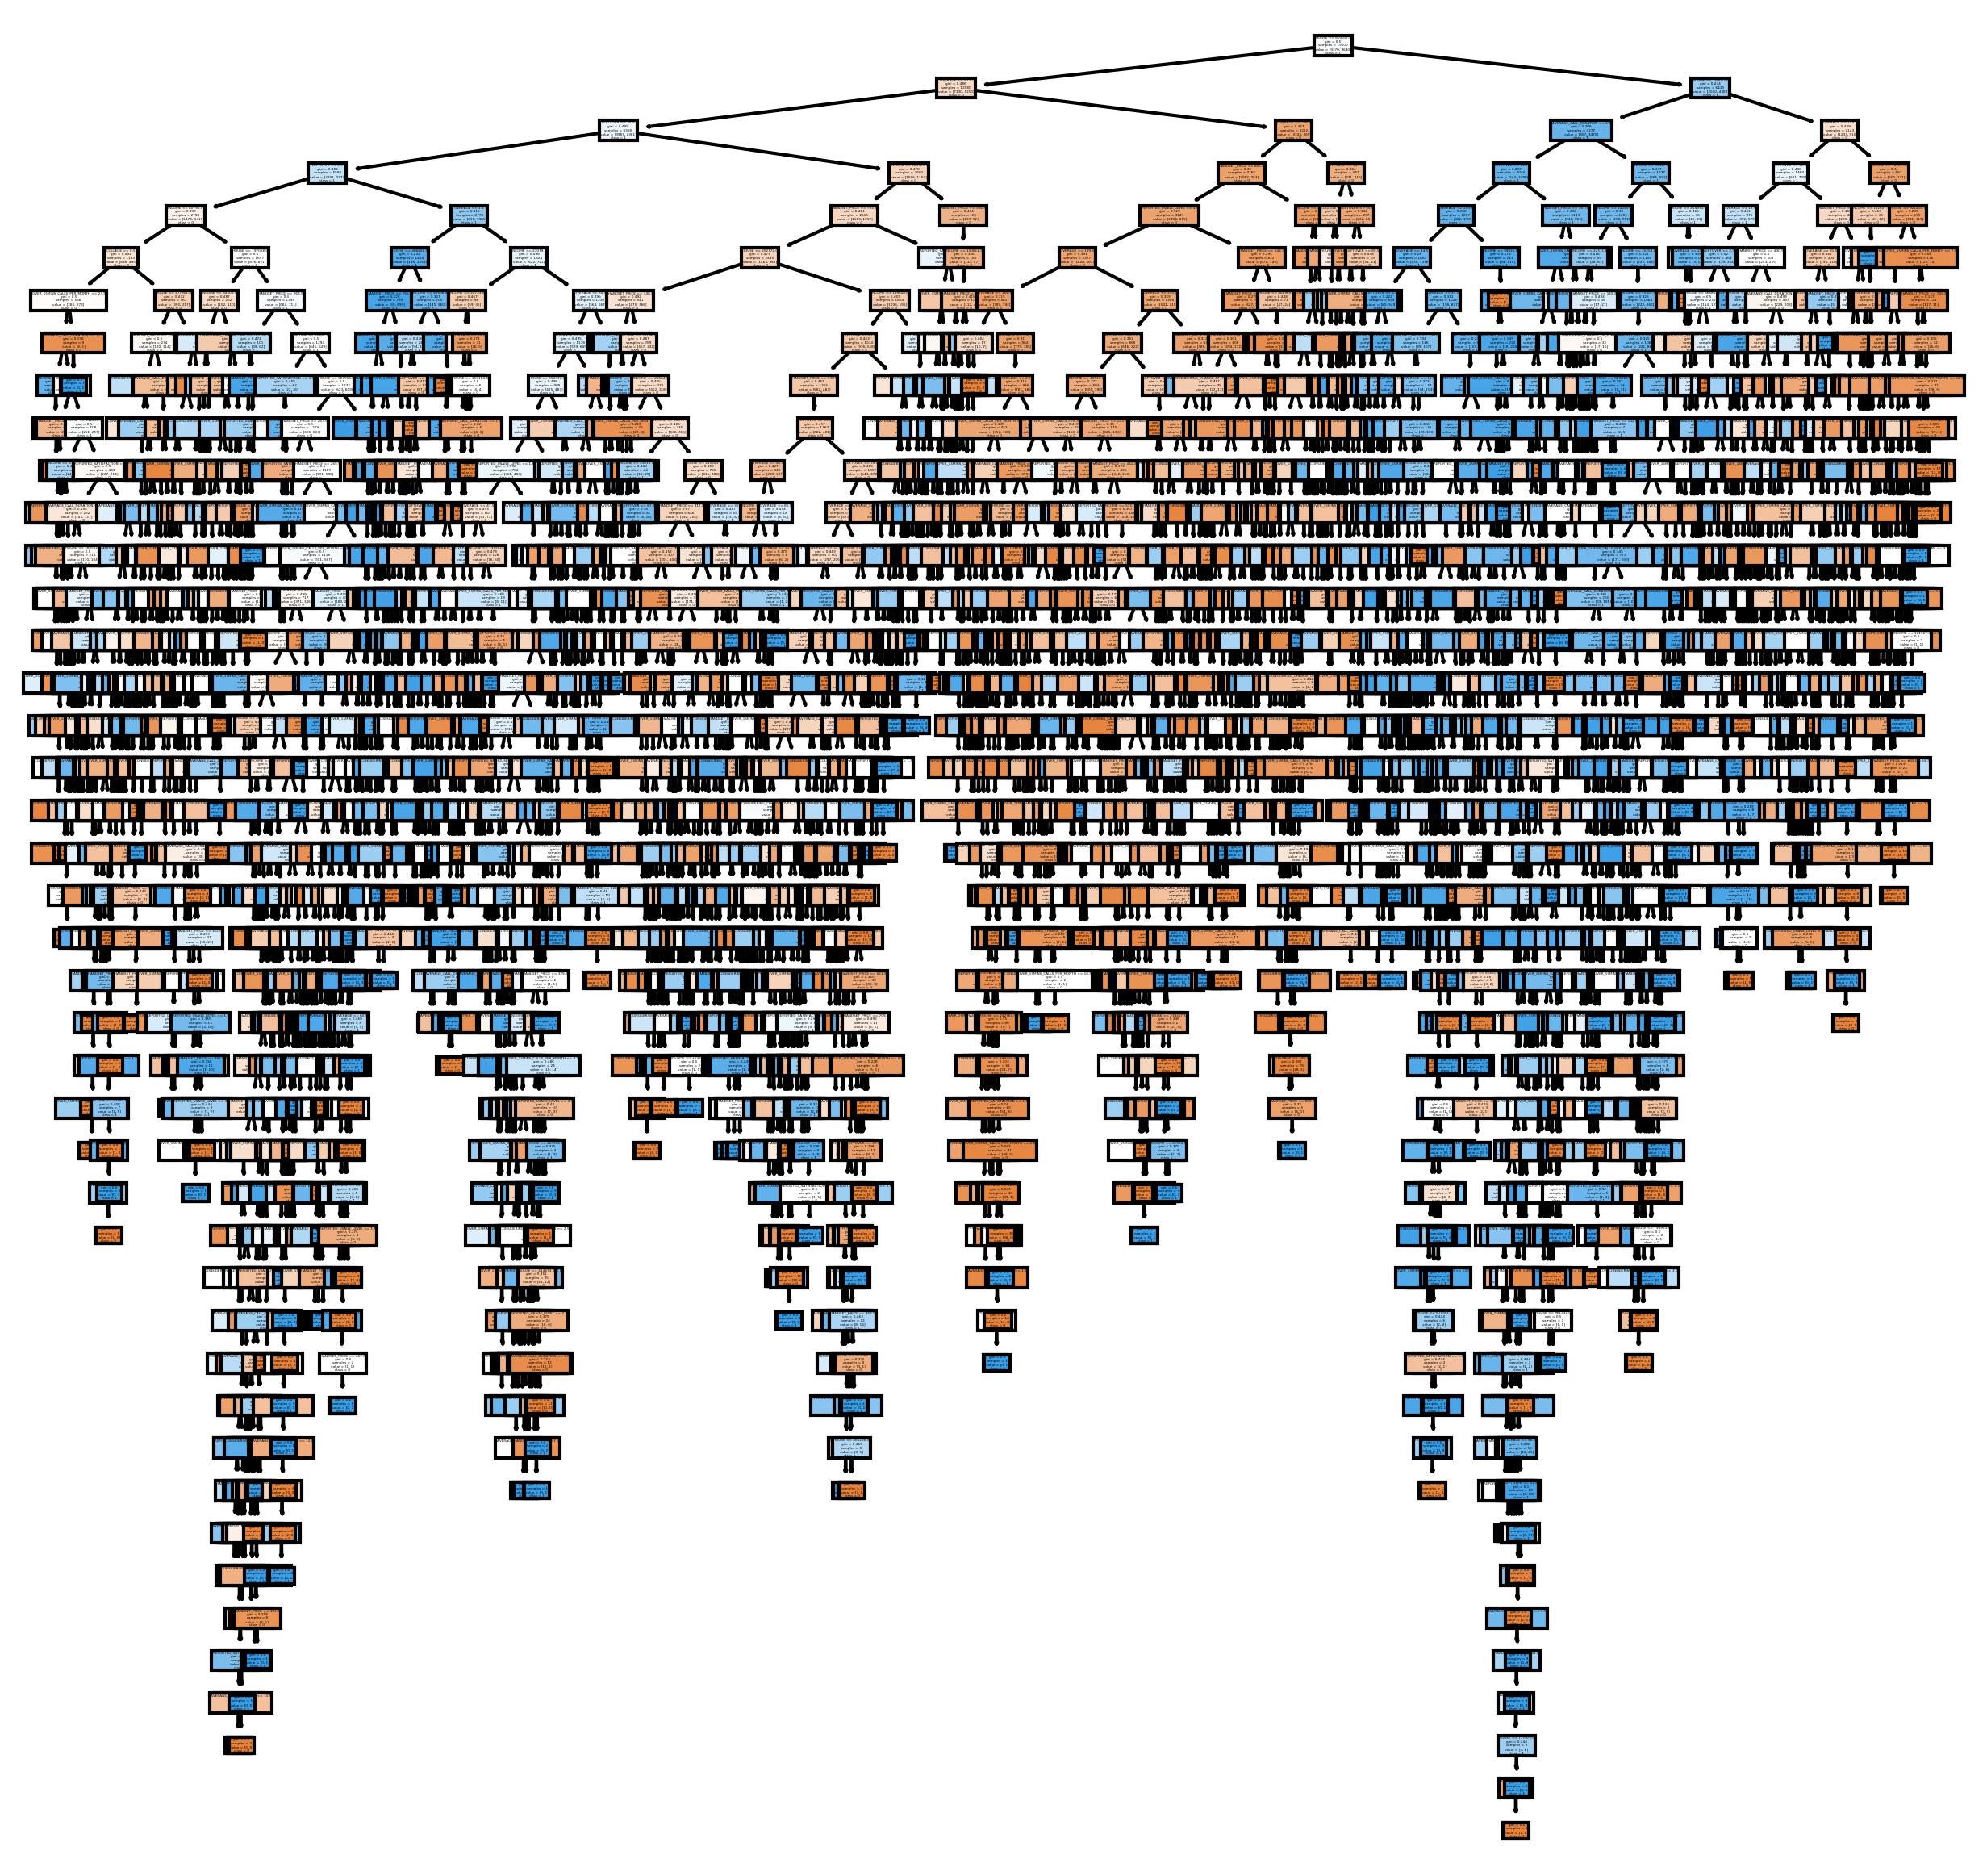

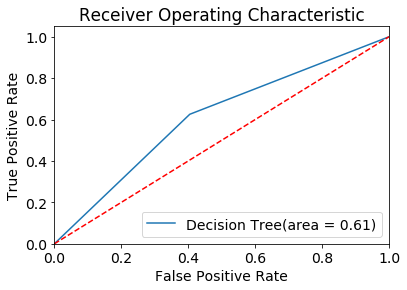


DECISION TREE COMPLETED

NOTEBOOK COMPLETED


In [10]:
main()